In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
plt.style.use('fivethirtyeight')
plt.style.use('seaborn-poster')

In [3]:
# From Covid Tracking API
# https://covidtracking.com/api/
api_us = 'https://covidtracking.com/api/us/daily'
api_states = 'https://covidtracking.com/api/states/daily'

# https://github.com/COVID19Tracking/associated-data
f_pop = 'associated-data/us_census_data/us_census_2018_population_estimates_states.csv'

In [4]:
df_us = pd.read_json(api_us)
df_states = pd.read_json(api_states)
df_pop = pd.read_csv(f_pop)

In [5]:
df_us.shape

(24, 17)

In [6]:
df_states.shape

(1205, 16)

In [7]:
df_pop.head()

,state,state_name,geo_id,population,pop_density
0,AL,Alabama,1,4887871,96.509389
1,AK,Alaska,2,737438,1.291523
2,AZ,Arizona,4,7171646,63.135855
3,AR,Arkansas,5,3013825,57.919684
4,CA,California,6,39557045,253.906502


In [8]:
df_us['date'] = df_us['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df_states['date'] = df_states['date'].apply(
    lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [9]:
df_us.sort_values(by=['date']).tail()

,date,states,positive,negative,posNeg,pending,hospitalized,death,total,hash,dateChecked,totalTestResults,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
4,2020-03-23,56,42152,237321,279473,14571,3325.0,471.0,294044,cca0aa4d7ad5221bf9e3b542fb56c03418b79874,2020-03-23T20:00:00Z,279473,73.0,771.0,43858.0,10273.0,54131.0
3,2020-03-24,56,51954,292758,344712,14433,4468.0,675.0,359145,eaedae24caa3d2c2dcbad823b248b729972e9960,2020-03-24T20:00:00Z,344712,204.0,1143.0,55437.0,9802.0,65239.0
2,2020-03-25,56,63928,357604,421532,51235,6136.0,900.0,472767,99e1bdff6a809d12b2e76a9e7c8a678d32a6f670,2020-03-25T20:00:00Z,421532,225.0,1668.0,64846.0,11974.0,76820.0
1,2020-03-26,56,80735,438603,519338,60251,10131.0,1163.0,579589,77e73bd9ca5316e76685e4fd31fd7adbd7ba4f45,2020-03-26T20:00:00Z,519338,263.0,3995.0,80999.0,16807.0,97806.0
0,2020-03-27,56,99447,527220,626667,60094,12036.0,1530.0,686761,6092705816471876a3ae91266e9f87a8c0d8fec8,2020-03-27T20:00:00Z,626667,367.0,1905.0,88617.0,18712.0,107329.0


In [10]:
df_states.sort_values(by=['date']).tail()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
32,2020-03-27,NE,85.0,1761.0,NaN,NaN,0.0,1846,2020-03-27T20:00:00Z,1846,31,0.0,0.0,177.0,12.0,189.0
31,2020-03-27,ND,65.0,2427.0,NaN,13.0,0.0,2492,2020-03-27T20:00:00Z,2492,38,0.0,3.0,388.0,13.0,401.0
30,2020-03-27,NC,763.0,14373.0,NaN,77.0,3.0,15136,2020-03-27T20:00:00Z,15136,37,1.0,48.0,2099.0,127.0,2226.0
28,2020-03-27,MS,579.0,2560.0,NaN,185.0,8.0,3139,2020-03-27T20:00:00Z,3139,28,2.0,35.0,269.0,94.0,363.0
0,2020-03-27,AK,69.0,2319.0,13.0,3.0,1.0,2401,2020-03-27T20:00:00Z,2388,2,0.0,0.0,518.0,10.0,528.0


In [11]:
# Merge in population data
df_states = pd.merge(df_states, df_pop, on='state')

# Calculate positive as percent of population
df_states['pos_by_pop'] = df_states['positive'] / df_states['population']

# Calculate total tests
df_states['total'] = df_states['positive'] + df_states['negative']

# Calculate percent of tests that are positive
df_states['positive_rate'] = df_states['positive'] / df_states['total']

# Calculate percent of population tested
df_states['test_rate'] = df_states['total'] / df_states['population']

In [12]:
df_states.tail()

,date,state,positive,negative,pending,hospitalized,death,total,dateChecked,totalTestResults,...,negativeIncrease,positiveIncrease,totalTestResultsIncrease,state_name,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
1152,2020-03-11,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-11T20:00:00Z,0,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1153,2020-03-10,WY,0.0,0.0,0.0,NaN,NaN,0.0,2020-03-10T20:00:00Z,0,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,0.0
1154,2020-03-09,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-09T20:00:00Z,0,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1155,2020-03-08,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-08T20:00:00Z,0,...,0.0,0.0,0.0,Wyoming,56,577737,5.950611,0.0,NaN,NaN
1156,2020-03-07,WY,0.0,NaN,NaN,NaN,NaN,NaN,2020-03-07T21:00:00Z,0,...,NaN,NaN,NaN,Wyoming,56,577737,5.950611,0.0,NaN,NaN


In [13]:
df_states.describe()

,positive,negative,pending,hospitalized,death,total,totalTestResults,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,geo_id,population,pop_density,pos_by_pop,positive_rate,test_rate
count,1157.000000,1052.000000,396.000000,153.000000,494.000000,1052.000000,1157.000000,1157.000000,1105.000000,1105.000000,1105.000000,1105.000000,1105.000000,1157.000000,1.157000e+03,1145.000000,1157.000000,1047.000000,1052.000000
mean,390.387208,2509.707224,574.512626,265.202614,12.684211,2937.658745,2672.333621,29.442524,1.384615,10.942081,475.880543,89.813575,565.693213,29.442524,6.588348e+06,431.243412,0.000044,0.126759,0.000510
std,2299.417595,7066.586289,4809.443732,909.038969,38.320754,9238.587715,8849.010240,16.215873,7.184394,113.700639,1393.713606,467.368886,1760.924781,16.215873,7.408416e+06,1605.372951,0.000134,0.151652,0.000874
min,0.000000,0.000000,-3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000000,-44.000000,-1.000000,-6.000000,1.000000,5.777370e+05,1.291523,0.000000,0.000000,0.000000
25%,5.000000,72.500000,4.000000,11.000000,1.000000,90.000000,48.000000,16.000000,0.000000,0.000000,0.000000,1.000000,8.000000,16.000000,1.805832e+06,54.955978,0.000001,0.037227,0.000020
50%,31.000000,323.500000,21.000000,46.000000,2.000000,405.000000,289.000000,29.000000,0.000000,0.000000,29.000000,8.000000,51.000000,29.000000,4.468402e+06,109.860468,0.000009,0.083333,0.000104
75%,158.000000,1994.750000,87.250000,113.000000,8.000000,2147.250000,1846.000000,42.000000,0.000000,0.000000,290.000000,37.000000,349.000000,42.000000,7.535591e+06,229.511156,0.000041,0.152543,0.000632
max,44635.000000,101118.000000,57400.000000,6844.000000,519.000000,145753.000000,145753.000000,72.000000,134.000000,3039.000000,16272.000000,7377.000000,23649.000000,72.000000,3.955704e+07,11490.119540,0.002284,0.891705,0.007458


# United States Positive Cases

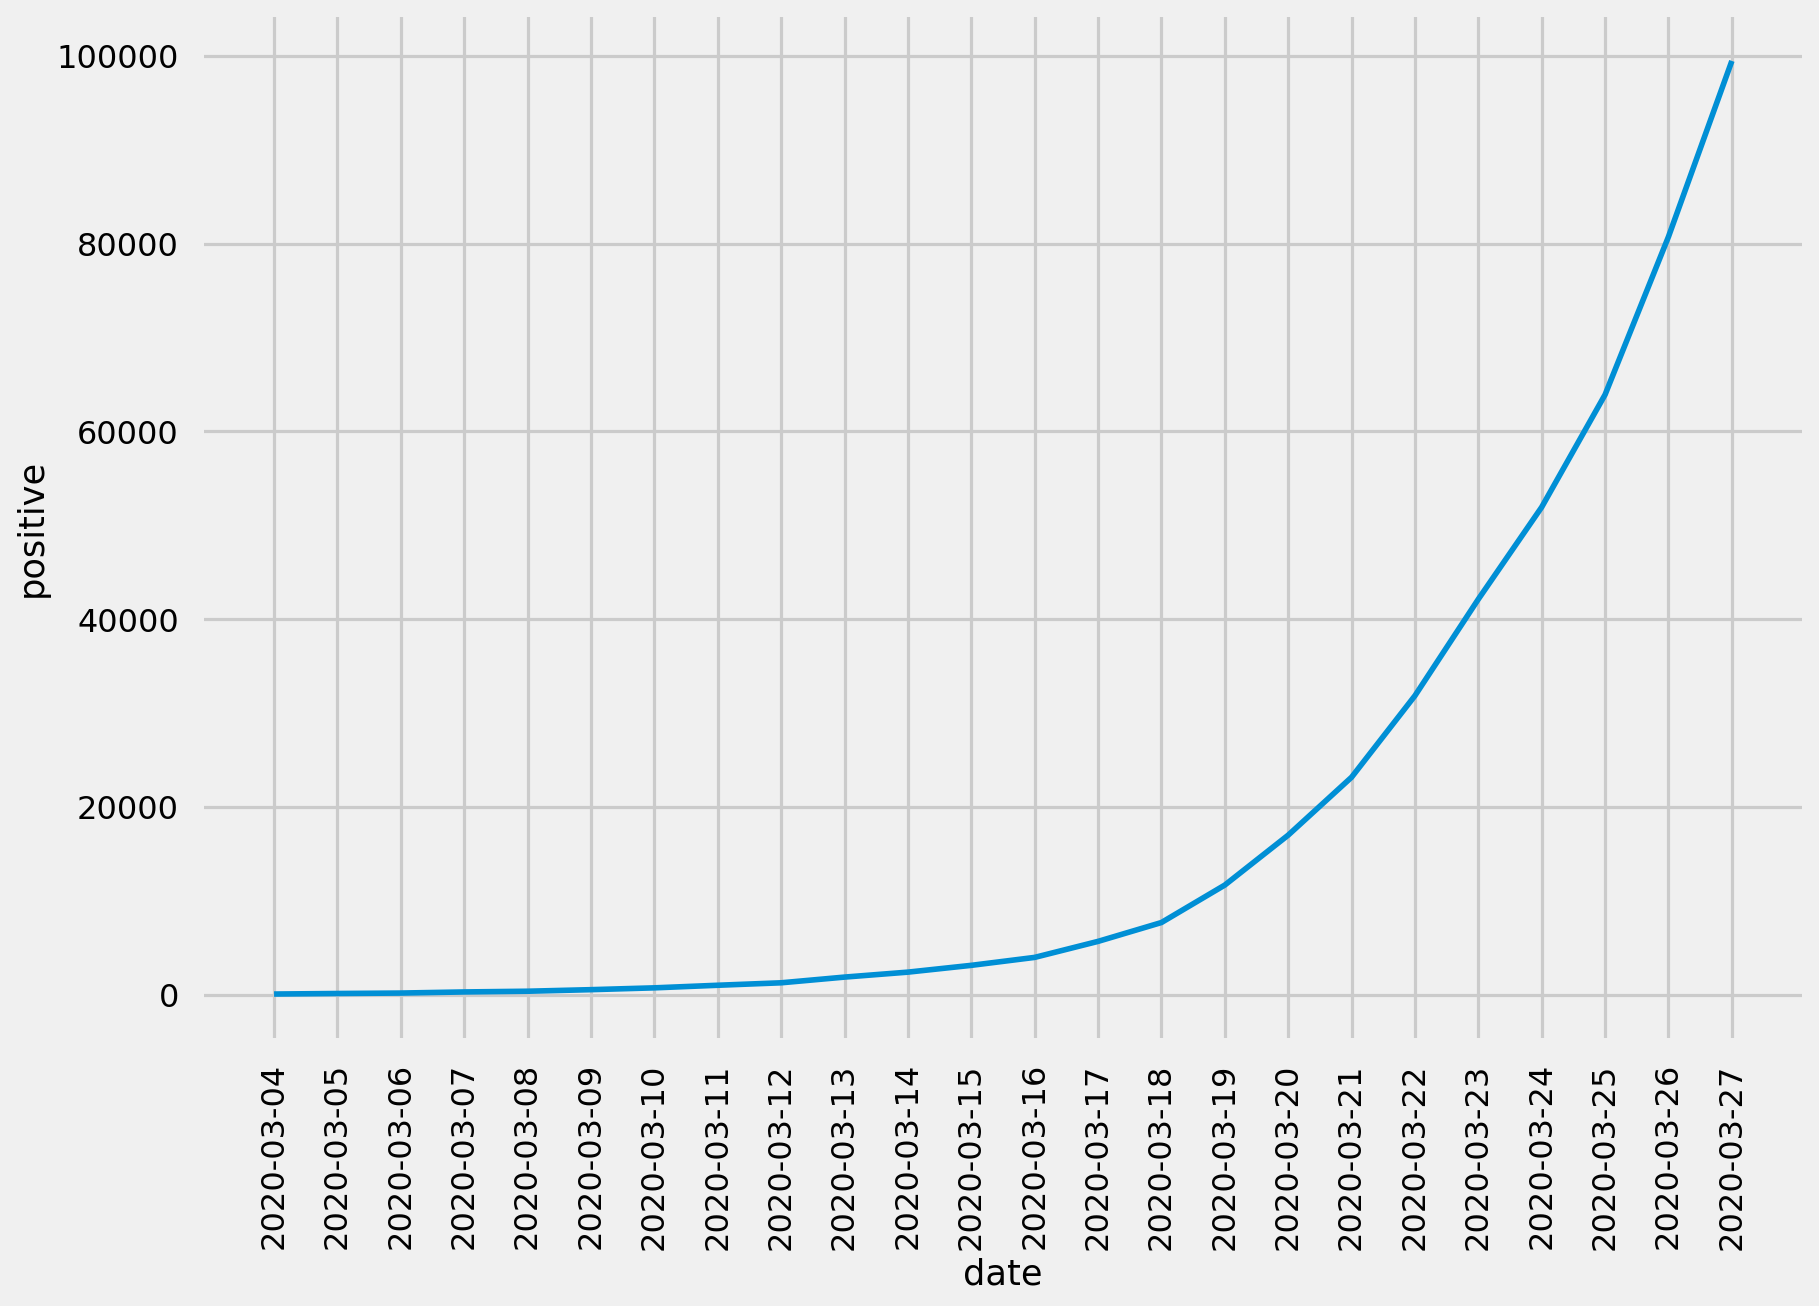

In [14]:
ax = sns.lineplot(x="date", 
                  y="positive", 
                  data=df_us)
ax.set(xticks=df_us.date.values)
plt.xticks(rotation=90)
plt.show()

# California Positive Cases

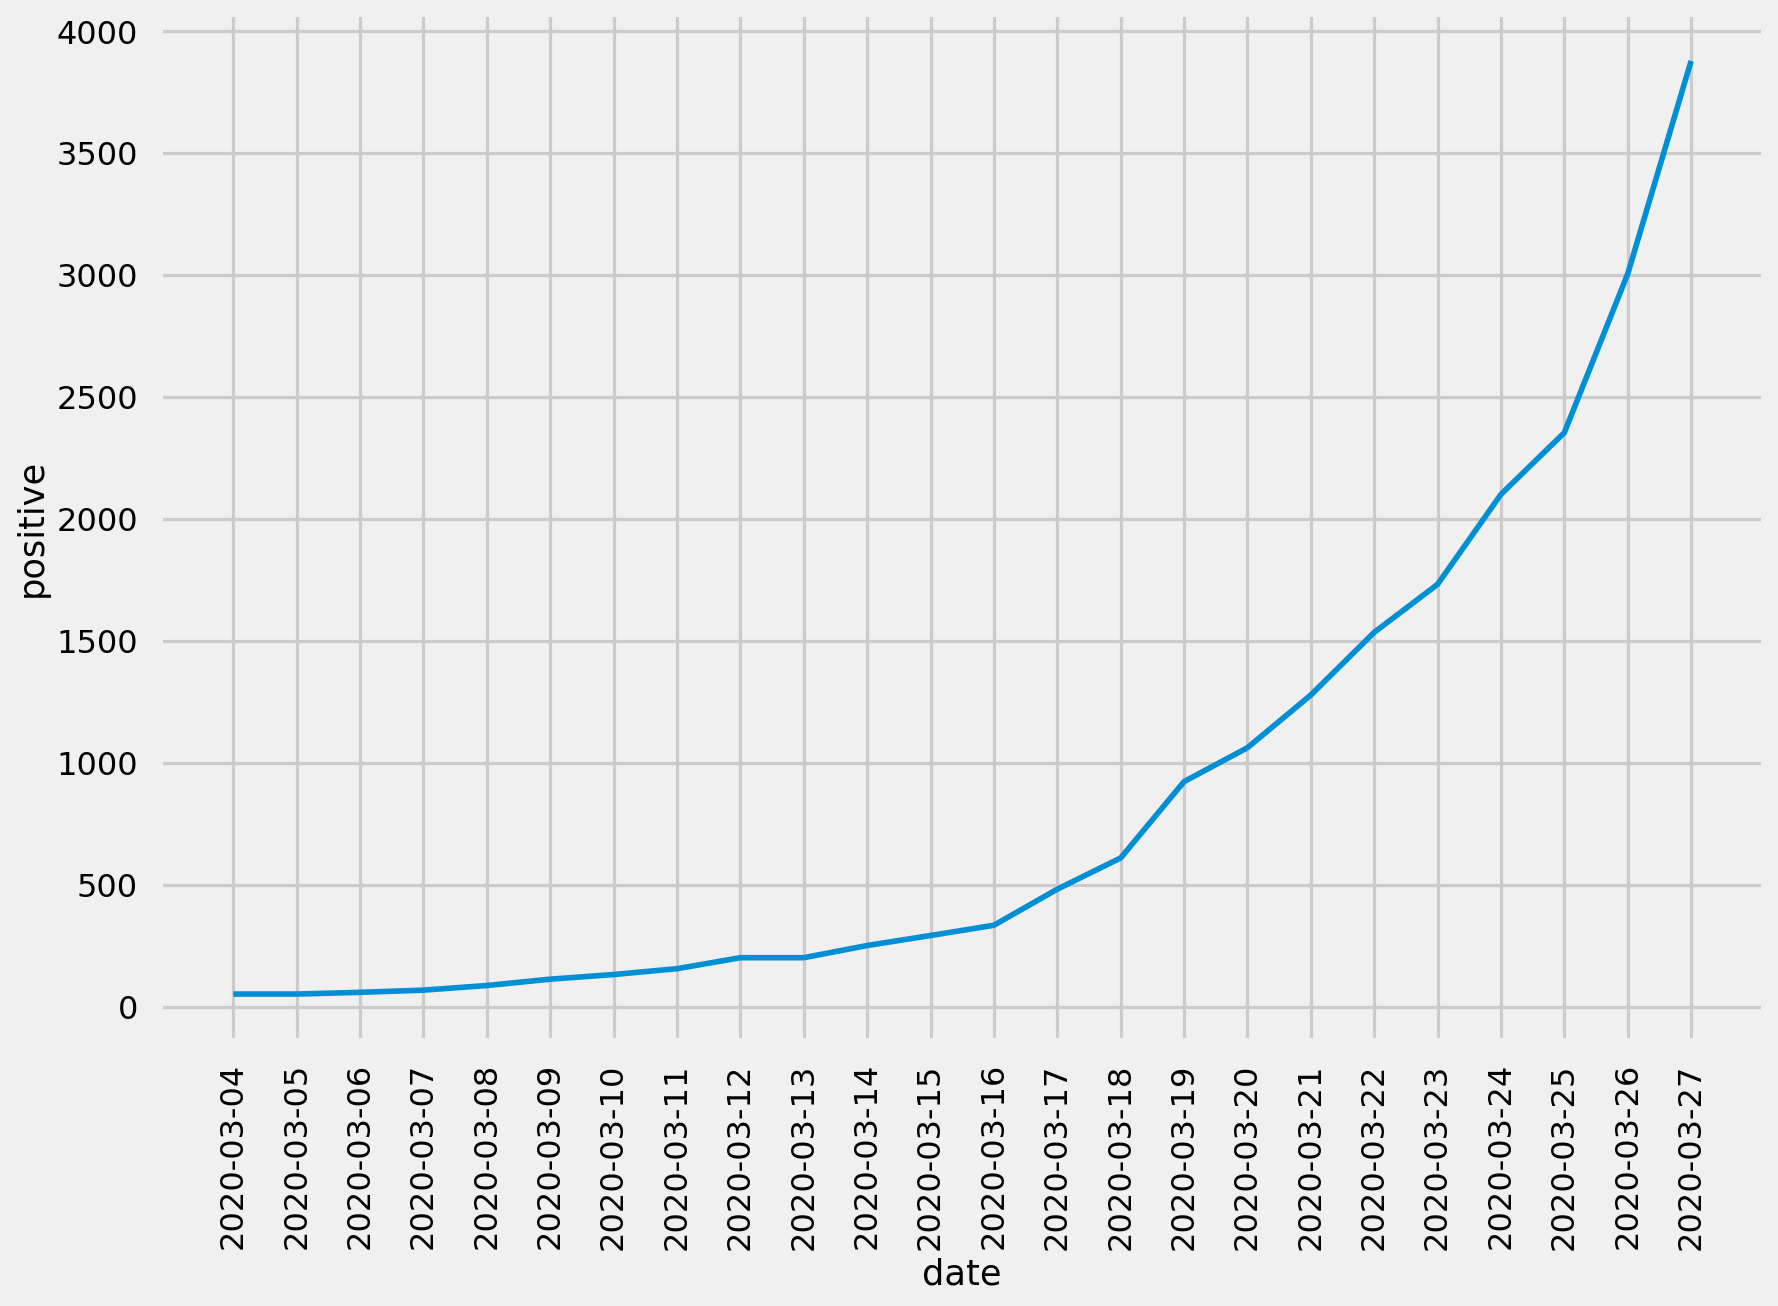

In [15]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
plt.show()

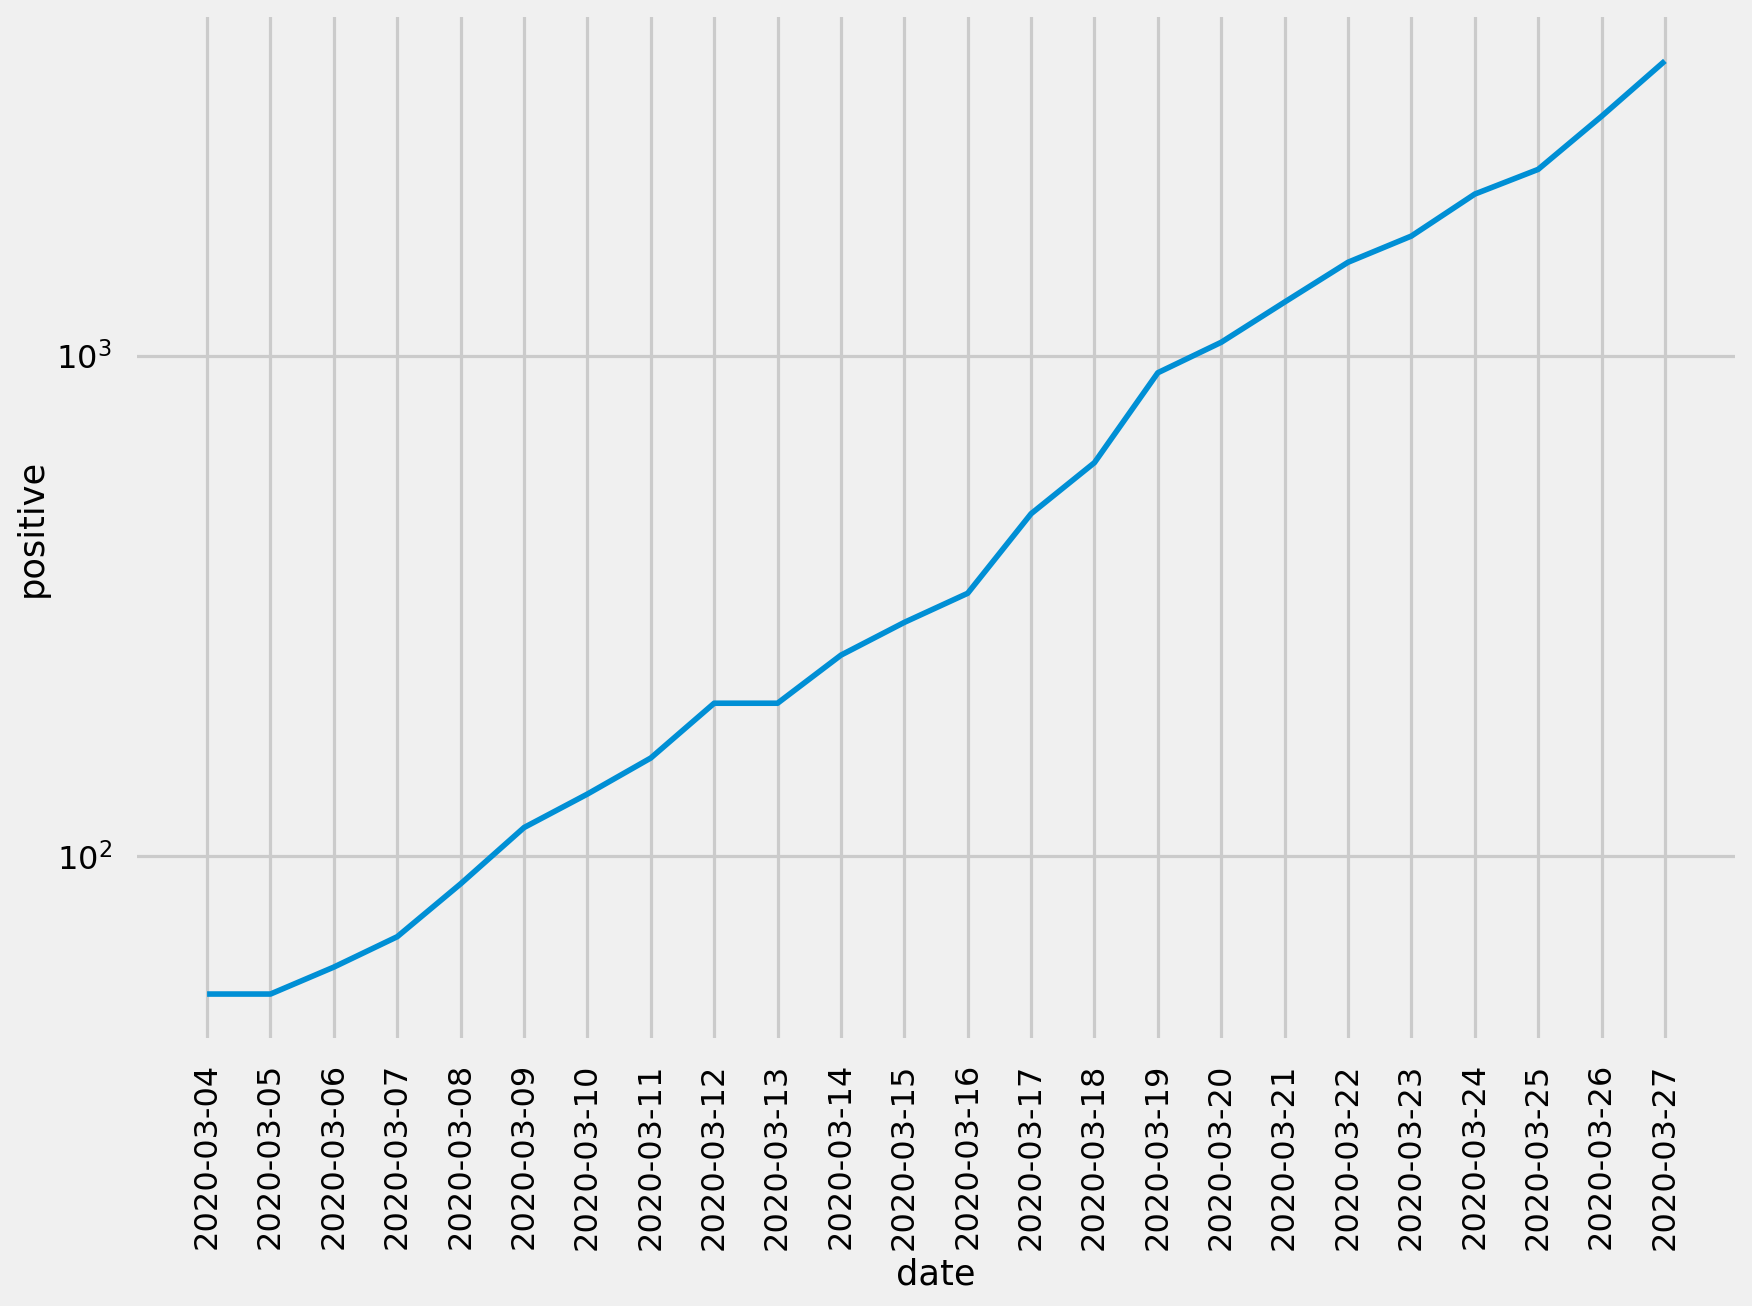

In [16]:
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

## Positive and Total Tests

## California

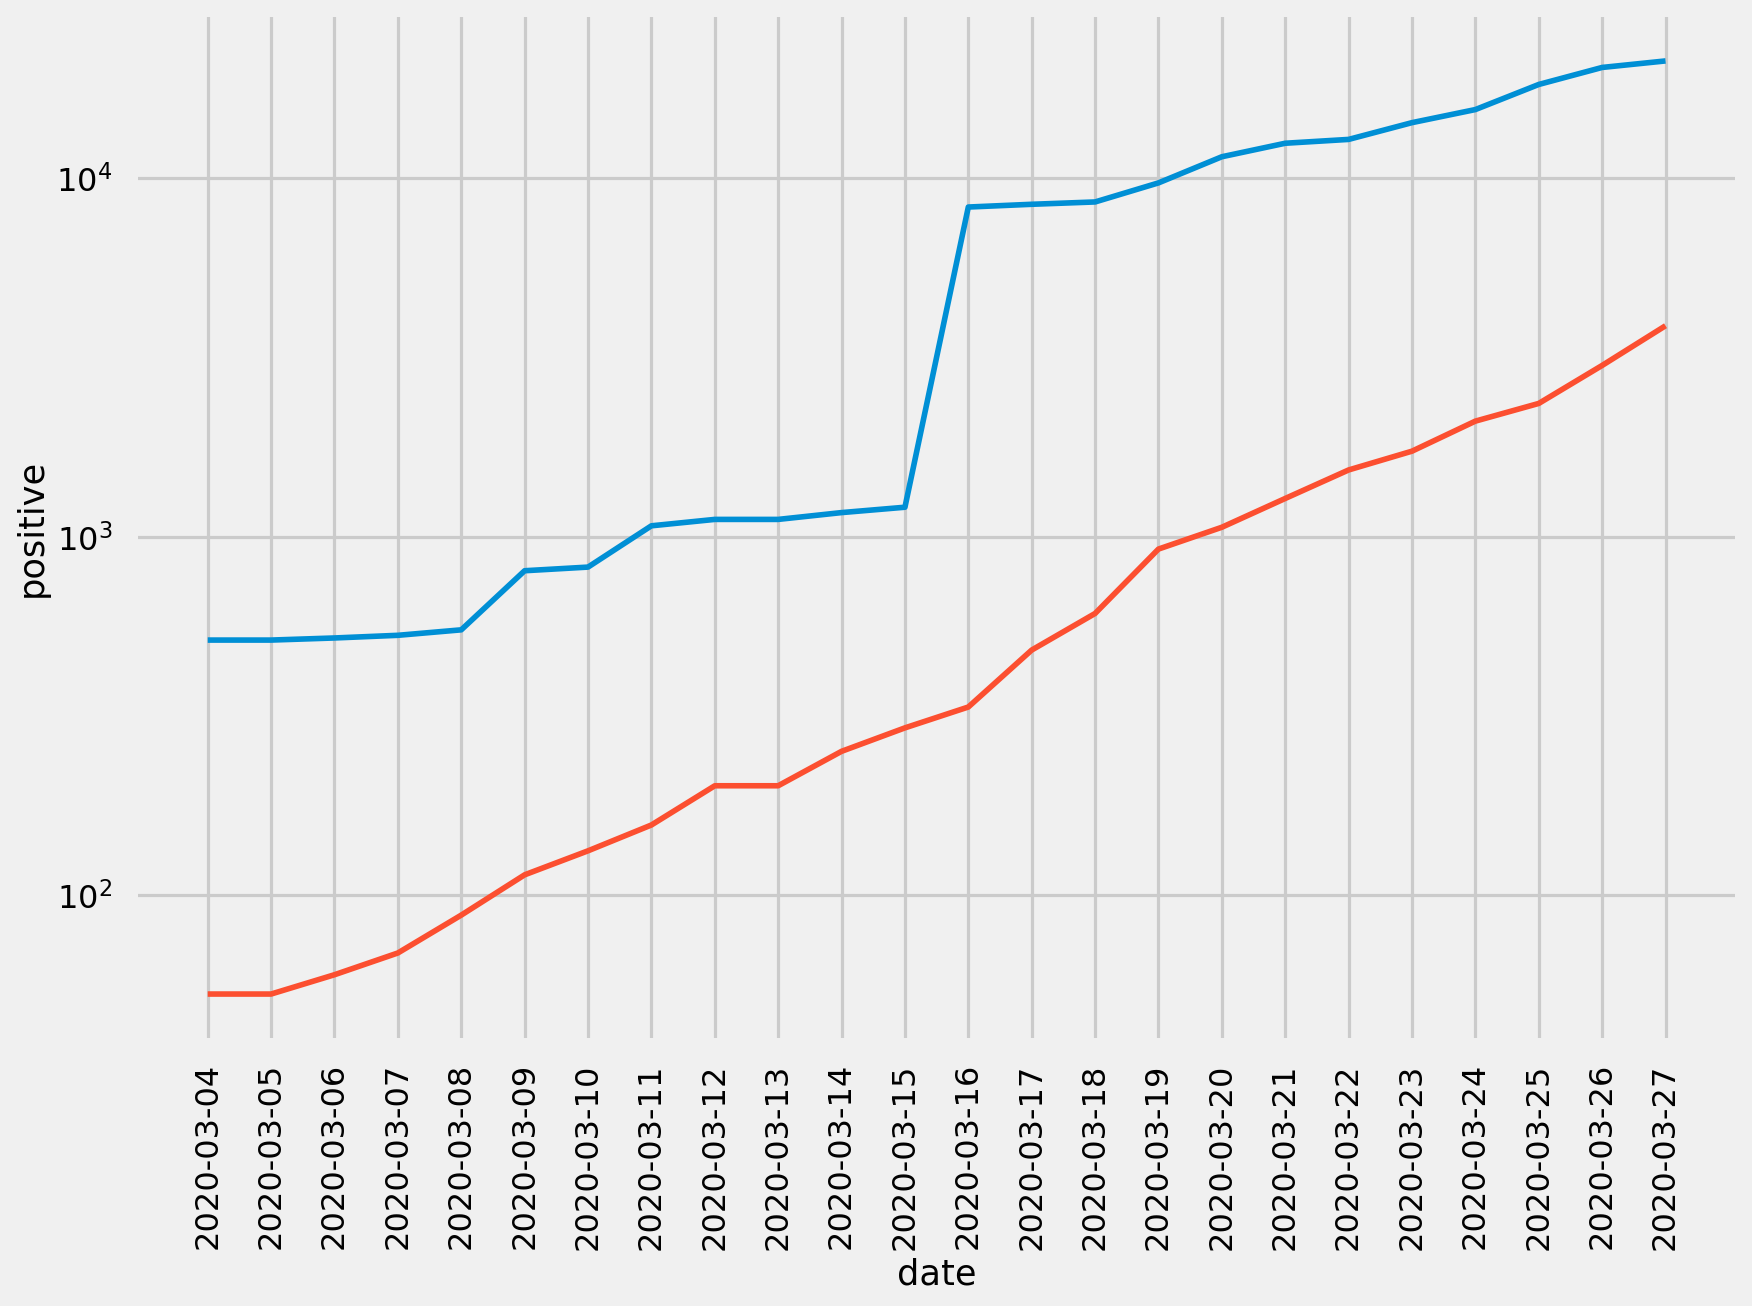

In [17]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "CA"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "CA"'))
ax.set(xticks=df_states.query('state == "CA"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

## New York

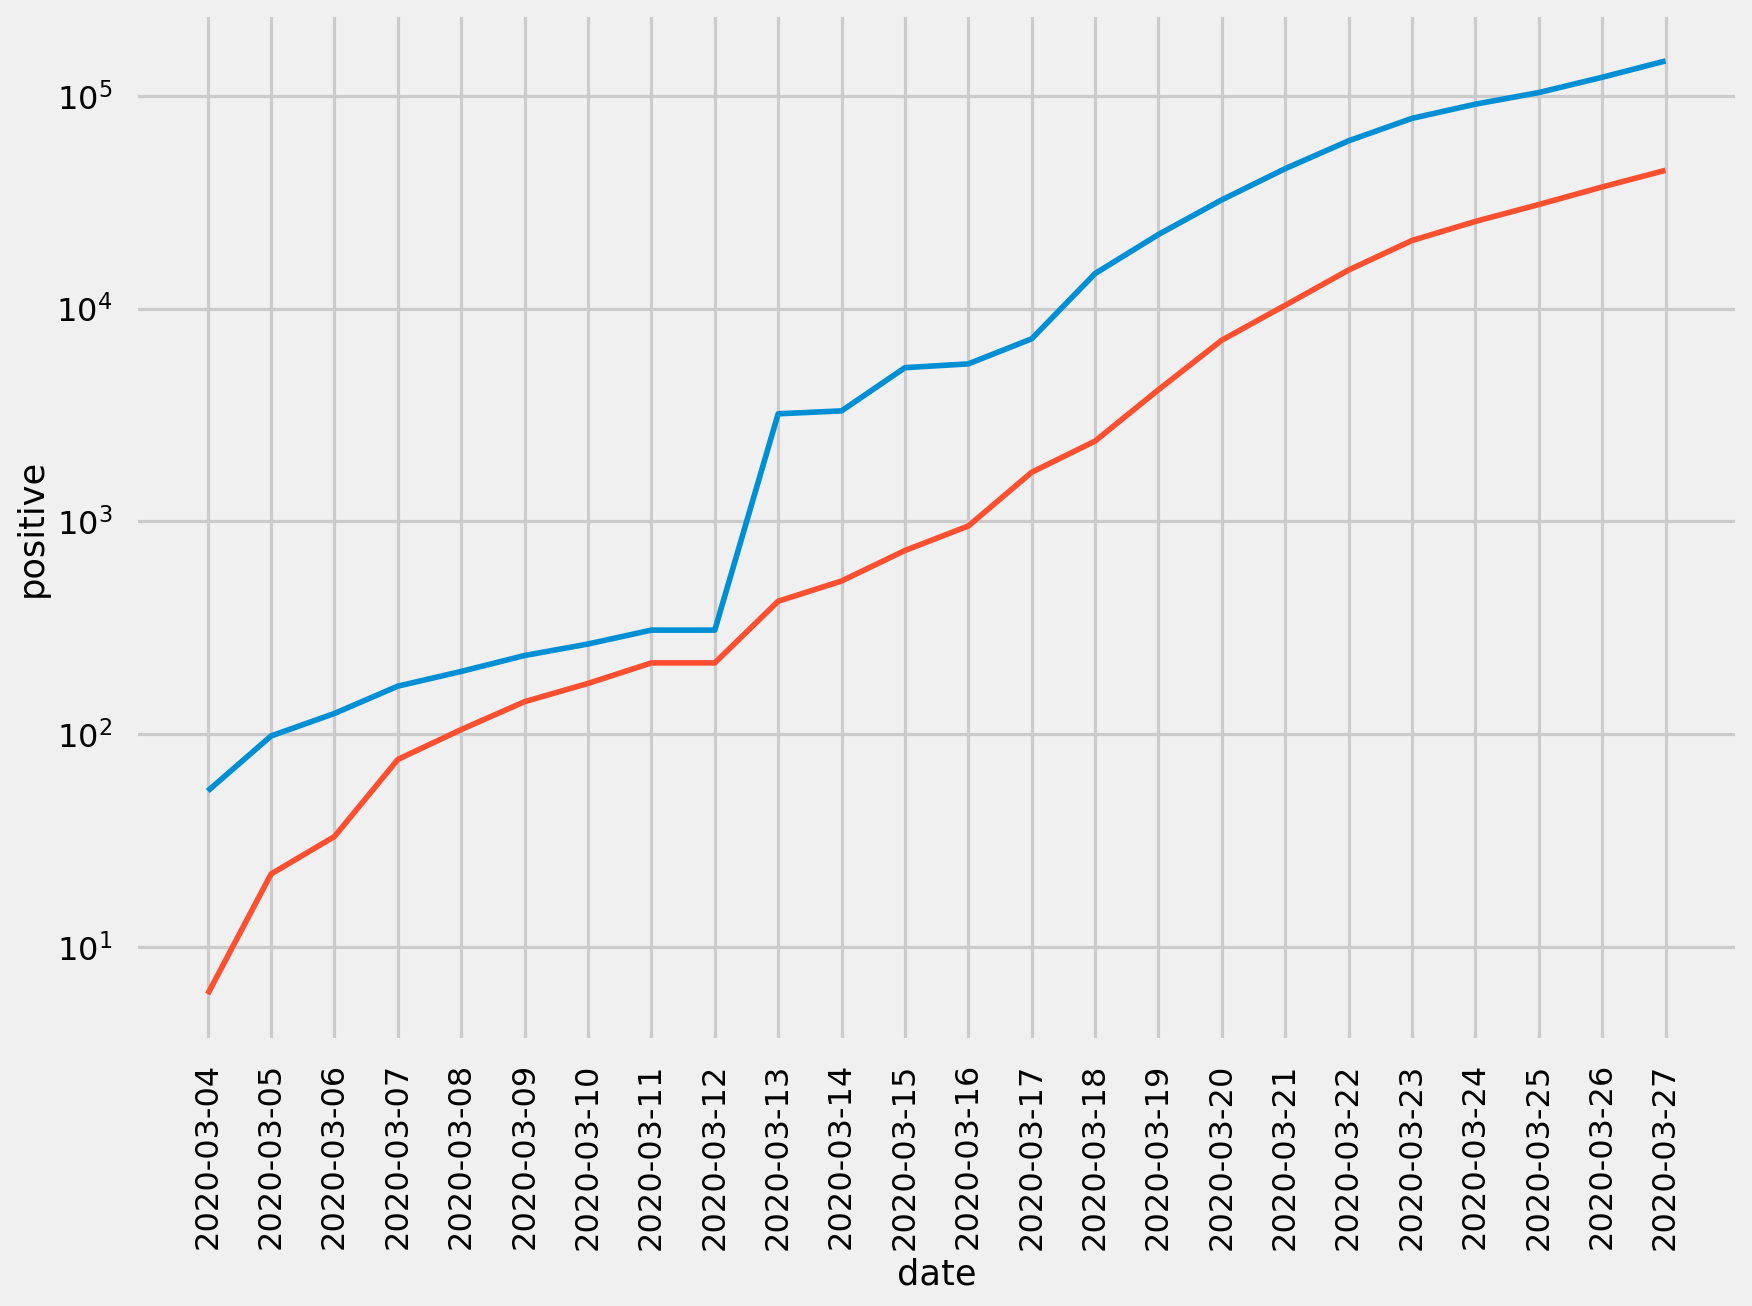

In [18]:
ax = sns.lineplot(x="date", y="total", 
                  data=df_states.query('state == "NY"'))
ax = sns.lineplot(x="date", y="positive", 
                  data=df_states.query('state == "NY"'))
ax.set(xticks=df_states.query('state == "NY"').date.values)
plt.xticks(rotation=90)
ax.set_yscale('log')
plt.show()

# Top 10 States

In [19]:
latest_date = df_states['date'].max()
top_states = df_states.query('date == @latest_date').sort_values(by='positive', 
                                                    ascending=False).state.head(10).tolist()
df_top_states = df_states.query('state == @top_states')
top_states

['NY', 'NJ', 'CA', 'MI', 'MA', 'WA', 'IL', 'FL', 'LA', 'PA']

In [20]:
df_states.query('date == @latest_date').sort_values(by='positive', ascending=False)[['state', 'positive']]

,state,positive
761,NY,44635.0
693,NJ,8825.0
89,CA,3879.0
493,MI,3657.0
425,MA,3240.0
1066,WA,3207.0
314,IL,3060.0
202,FL,2765.0
404,LA,2746.0
853,PA,2218.0


# Top State Positive Cases (Log Scale)

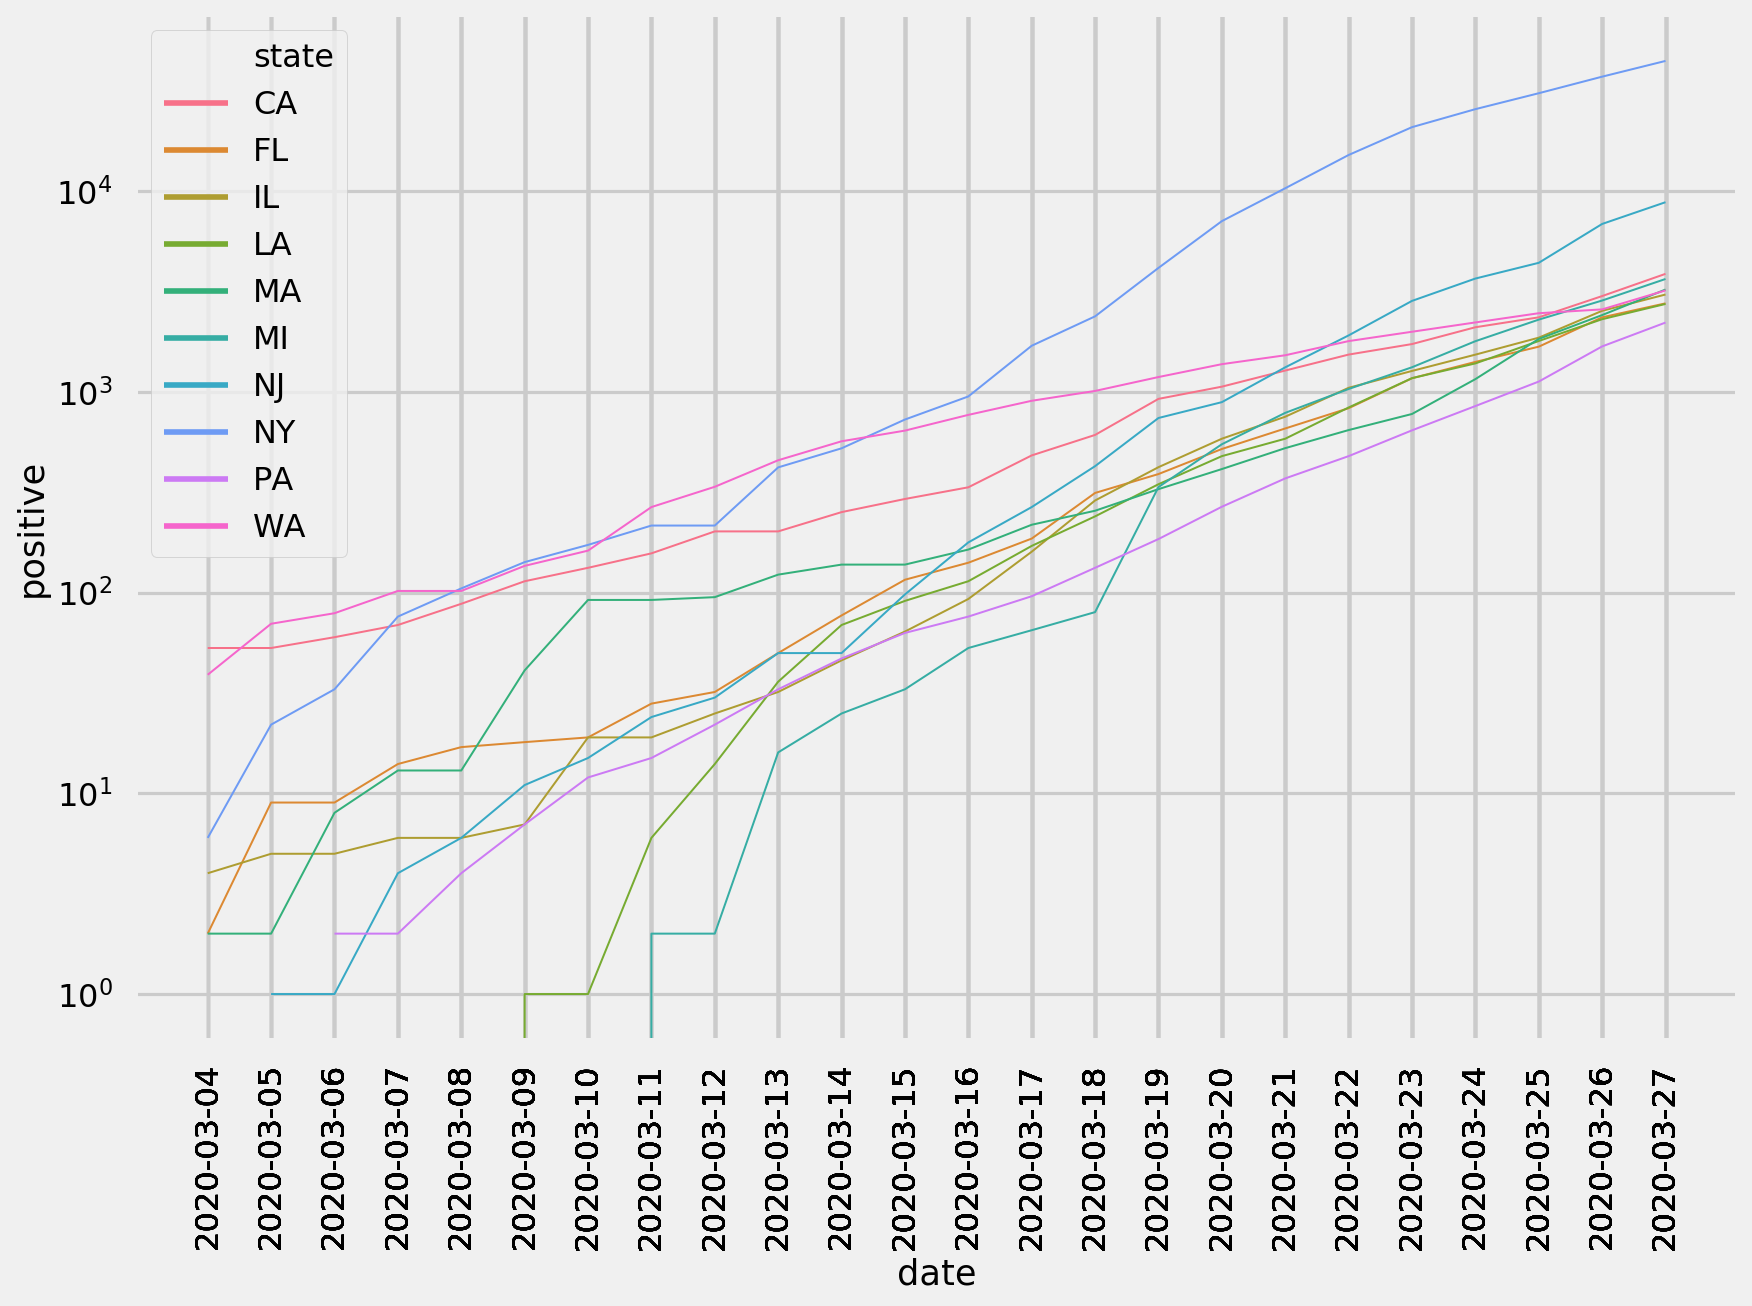

In [21]:
ax = sns.lineplot(x="date", y="positive", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Top State Positive Cases as Percent of Population (Log Scale)

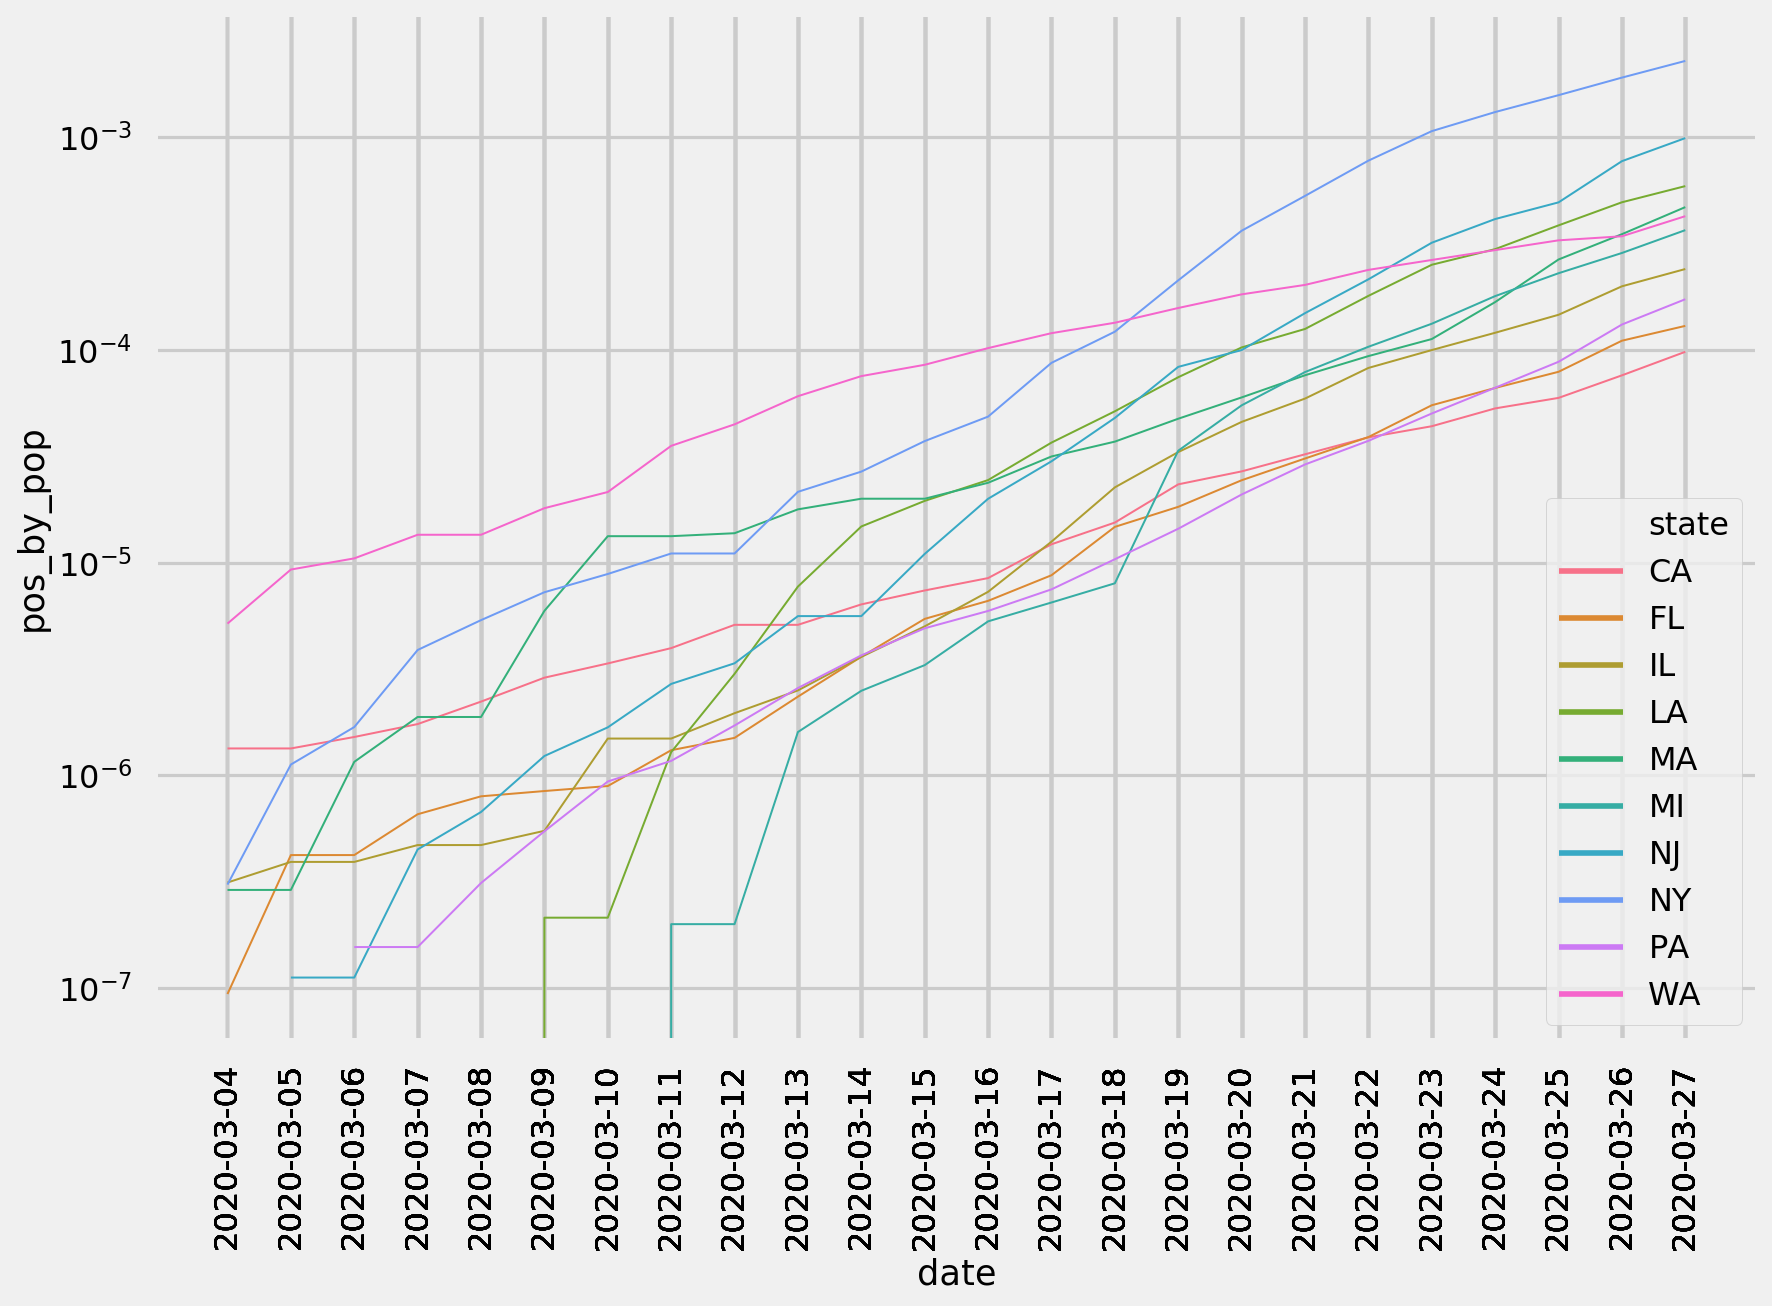

In [22]:
ax = sns.lineplot(x="date", y="pos_by_pop", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()

# Percentage of Population Tested

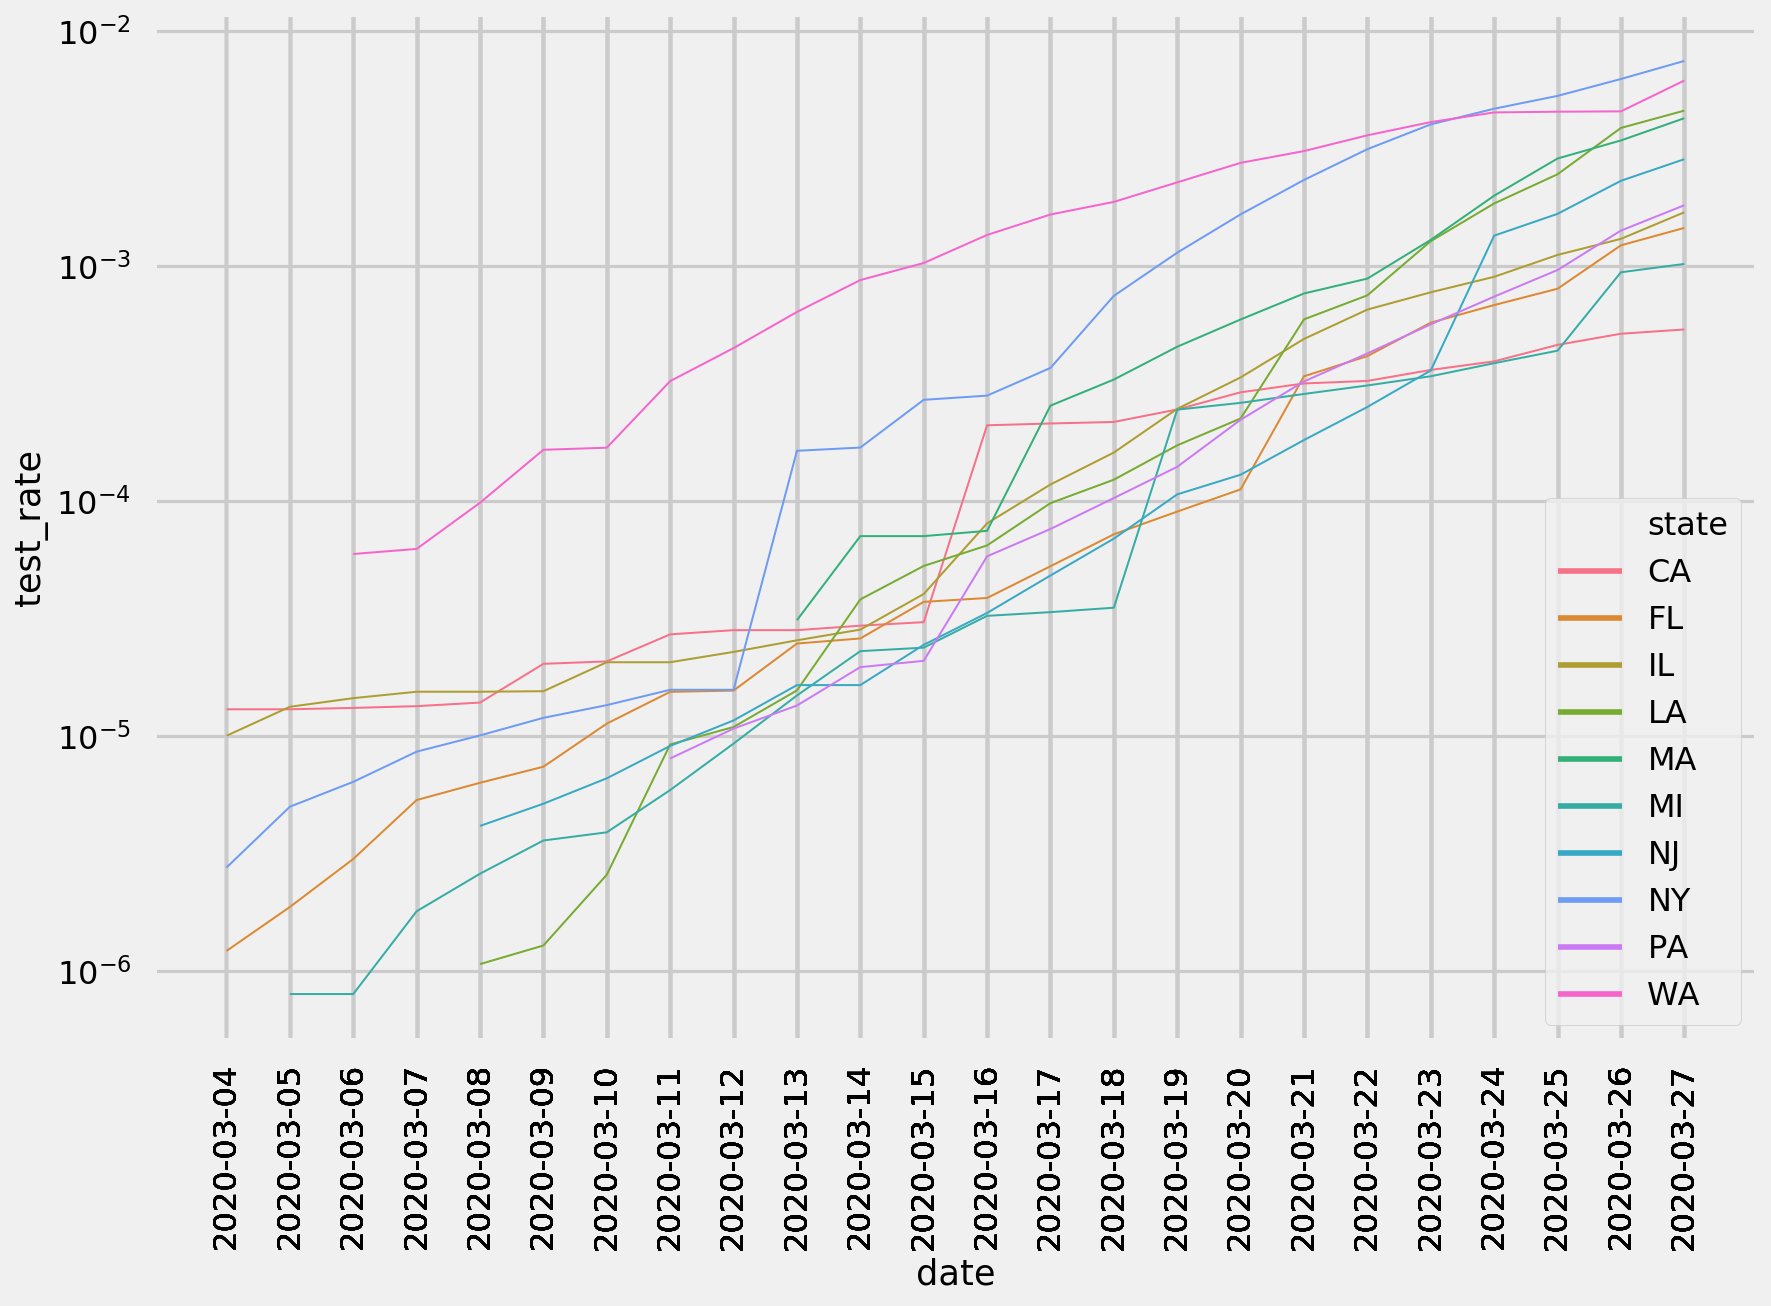

In [23]:
ax = sns.lineplot(x="date", y="test_rate", 
                  hue="state",
                  estimator=None, 
                  lw=1,
                  data=df_top_states)
ax.set(xticks=df_top_states.date.values)
ax.set_yscale('log')
plt.xticks(rotation=90)
plt.show()